In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/tracks_no_duplicate.csv")

In [40]:
display(df.head())
df.shape

,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,liveness,...,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit,idx
0,5OpjJ9qy54D3PzQJ1s4Q9X,TESTIFY,acoustic,https://open.spotify.com/track/5OpjJ9qy54D3PzQ...,59.0,0.471,0.495,0.710,0.000000,0.0703,...,243800.0,0.0,-3.941,1.0,90.024,0.319,79.0,2016-07-15,0.0,0
1,6ZgaHk6yrHBbHrbTmKl2pZ,Learned A Lot,acoustic,https://open.spotify.com/track/6ZgaHk6yrHBbHrb...,39.0,0.850,0.556,0.285,0.068000,0.1090,...,270786.0,0.0,-9.884,1.0,128.167,0.322,78.0,2011,0.0,1
2,4wQKyYfNDY7E8ybcp0hF61,Jupiter's Call,acoustic,https://open.spotify.com/track/4wQKyYfNDY7E8yb...,35.0,0.879,0.694,0.354,0.000083,0.3810,...,180952.0,2.0,-12.275,1.0,130.346,0.652,79.0,2018-06-01,0.0,2
3,3JndPOkXLuhupgWnRrPSua,Rain,acoustic,https://open.spotify.com/track/3JndPOkXLuhupgW...,36.0,0.654,0.497,0.372,0.000000,0.0624,...,248293.0,5.0,-8.094,1.0,94.604,0.290,56.0,2002-04-09,0.0,3
4,3tjQYh1H3c17IQMdd8AIBb,The Shining Barrier,acoustic,https://open.spotify.com/track/3tjQYh1H3c17IQM...,40.0,0.794,0.373,0.160,0.764000,0.1070,...,251075.0,10.0,-21.342,1.0,112.578,0.144,79.0,2014-09-15,0.0,4


(10963, 21)

In [4]:
#MAC上沒有這問題
df = df.drop(columns=['Unnamed: 0'])

KeyError: "labels ['Unnamed: 0'] not contained in axis"

In [6]:
display(df.head())
df.shape

,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,liveness,...,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit,idx
0,5OpjJ9qy54D3PzQJ1s4Q9X,TESTIFY,acoustic,https://open.spotify.com/track/5OpjJ9qy54D3PzQ...,59.0,0.471,0.495,0.710,0.000000,0.0703,...,243800.0,0.0,-3.941,1.0,90.024,0.319,79.0,2016-07-15,0.0,0
1,6ZgaHk6yrHBbHrbTmKl2pZ,Learned A Lot,acoustic,https://open.spotify.com/track/6ZgaHk6yrHBbHrb...,39.0,0.850,0.556,0.285,0.068000,0.1090,...,270786.0,0.0,-9.884,1.0,128.167,0.322,78.0,2011,0.0,1
2,4wQKyYfNDY7E8ybcp0hF61,Jupiter's Call,acoustic,https://open.spotify.com/track/4wQKyYfNDY7E8yb...,35.0,0.879,0.694,0.354,0.000083,0.3810,...,180952.0,2.0,-12.275,1.0,130.346,0.652,79.0,2018-06-01,0.0,2
3,3JndPOkXLuhupgWnRrPSua,Rain,acoustic,https://open.spotify.com/track/3JndPOkXLuhupgW...,36.0,0.654,0.497,0.372,0.000000,0.0624,...,248293.0,5.0,-8.094,1.0,94.604,0.290,56.0,2002-04-09,0.0,3
4,3tjQYh1H3c17IQMdd8AIBb,The Shining Barrier,acoustic,https://open.spotify.com/track/3tjQYh1H3c17IQM...,40.0,0.794,0.373,0.160,0.764000,0.1070,...,251075.0,10.0,-21.342,1.0,112.578,0.144,79.0,2014-09-15,0.0,4


(10963, 21)

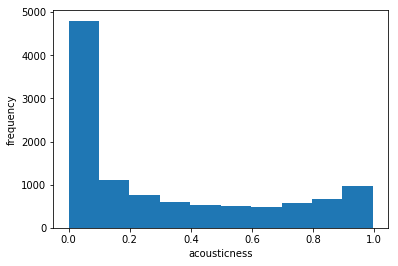

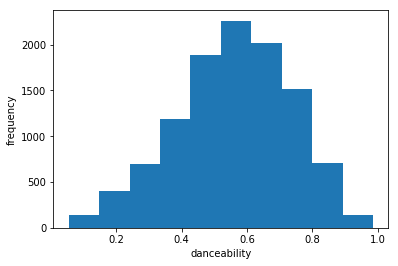

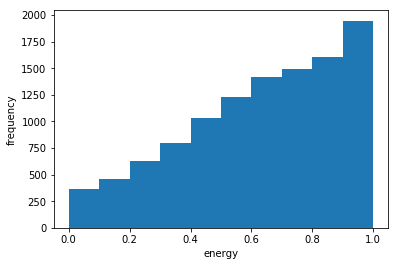

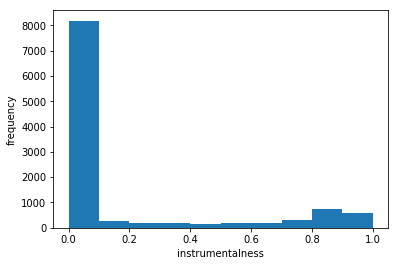

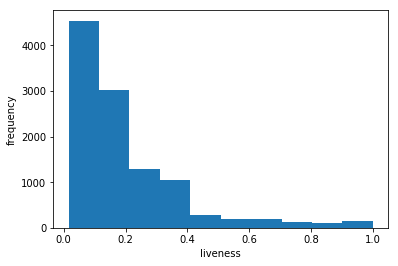

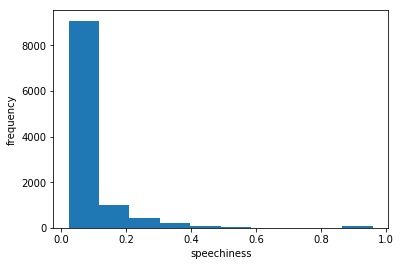

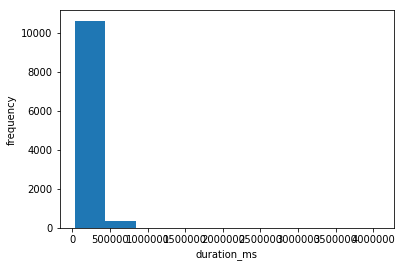

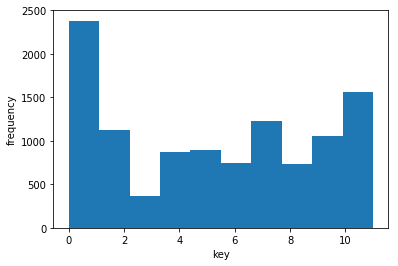

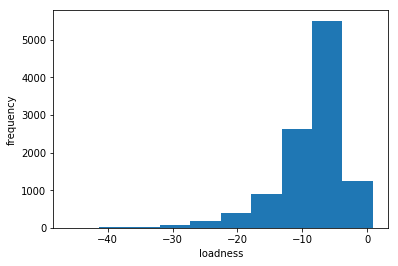

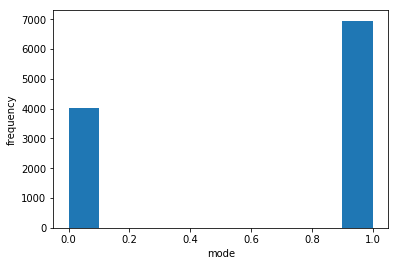

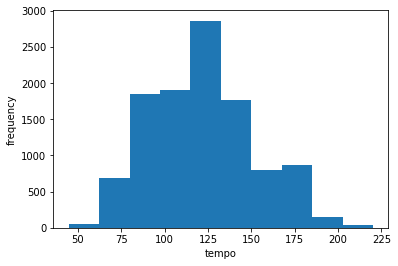

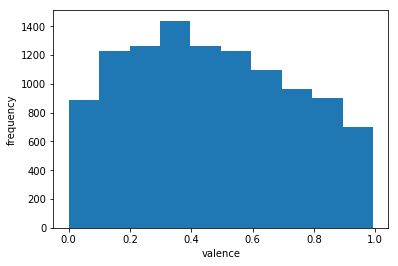

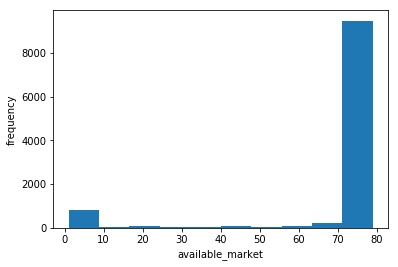

In [7]:
for i in range(5,18):
    histogram = plt.hist(df.iloc[:,i])
    plt.ylabel("frequency")
    columns_name = df.columns.values.tolist()[i]
    plt.xlabel(columns_name)
    plt.show()

In [15]:
genre_catogory = pd.DataFrame(df['genre'].value_counts().sort_index())
display(genre_catogory.head())
display(genre_catogory.tail())
print(genre_catogory.index)
print(genre_catogory.shape)

,genre
acoustic,99
afrobeat,100
alt-rock,95
alternative,89
ambient,97


,genre
techno,97
trance,99
trip-hop,99
turkish,100
world-music,100


Index(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil',
       ...
       'soul', 'spanish', 'swedish', 'synth-pop', 'tango', 'techno', 'trance',
       'trip-hop', 'turkish', 'world-music'],
      dtype='object', length=112)
(112, 1)


In [16]:
popularity_catogory = pd.DataFrame(df['popularity'].value_counts())
popularity_catogory = popularity_catogory.sort_index() #根據index調整順序
display(popularity_catogory)

,popularity
0.0,342
1.0,71
2.0,45
3.0,35
4.0,37
5.0,37
6.0,50
7.0,33
8.0,60
9.0,62


In [41]:
pop=list(popularity_catogory.index)
num=list(popularity_catogory['popularity'])

Text(0.5,1,'popularity distribution')

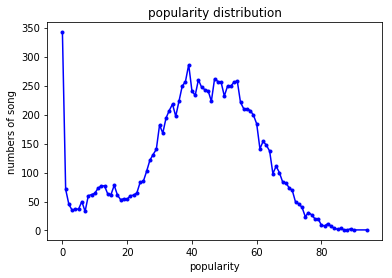

In [42]:
plt.plot(pop,num,'o-',c='blue',markersize = 3) 
plt.xlabel("popularity")
plt.ylabel("numbers of song")
plt.title("popularity distribution")

In [43]:
pop_is_0 = df['popularity'] == 0 
df_pop_0 = df[pop_is_0]
genre_catogory_0 = pd.DataFrame(df_pop_0['genre'].value_counts().sort_index())
display(genre_catogory_0)
genre_catogory_0.shape

,genre
bluegrass,1
brazil,11
british,1
children,2
dance,1
detroit-techno,37
disco,1
forro,6
french,6
funk,2


(55, 1)

In [44]:
ratio = genre_catogory_0/genre_catogory
display(ratio.sort_values(by=['genre'],ascending=False))

,genre
romance,0.680000
iranian,0.555556
kids,0.494949
detroit-techno,0.373737
opera,0.120000
brazil,0.114583
sertanejo,0.090909
pop-film,0.080808
forro,0.063830
french,0.062500


In [ ]:
#抓取特定曲風並彙整成一組
group_1 = ['death-metal', 'black-metal', 'heavy-metal', 'metal', 'metalcore', 'grindcore', 'hardcore', 'emo']
group_2 = ['hard-rock', 'alt-rock',  'j-rock', 'rock', 'rock-n-roll', 'rockabilly', 'psych-rock', 'punk', 'punk-rock', 'grunge', 'goth']
group_3 = ['cantopop', 'j-pop',  'j-idol' 'k-pop', 'pop', 'pop-film', 'power-pop', 'mandopop', 'synth-pop', 'indie-pop']
group_4 = ['afrobeat', 'blues', 'chill', 'funk', 'r-n-b', 'groove', 'jazz']
group_5 = ['acoustic', 'piano', 'drum-and-bass', 'guitar']
group_6 = ['chicago-house', 'house', 'progressive-house', 'deep-house', 'ambient', 'electronic', 'breakbeat', 'industrial', 'techno', 'hardstyle',  'club', 'dub', 'dubstep', 'idm', 'detroit-techno', 'electro', 'edm', 'minimal-techno', 'trance', 'trip-hop']
group_7 = ['children', 'kids']
group_8 = ['dance', 'dancehall', 'j-dance', 'tango', 'disco', 'garage']
group_9 = ['reggae', 'reggaeton', 'ska']
group_10 = ['bluegrass', 'country', 'honky-tonk', 'sertanejo', 'folk']
group_11 = ['comedy', 'happy']
group_12 = ['latin', 'brazil', 'salsa', 'latino', 'samba', 'mpb', 'forro', 'pagode']
group_13 = ['hip-hop', 'alternative']
group_14 = ['british', 'french', 'german', 'indian','spanish', 'swedish', 'turkish', 'world-music','iranian','malay']
group_15 = ['opera', 'show-tunes']

group = [group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,group_11,group_12,group_13,group_14,group_15]

data_group = []
genre_group = []
popularity_group = []
mean_group = []

for i in range(0,15):
    data = df.iloc[[g in group[i] for g in df["genre"]], :]

    #檢查曲風，並看看每種曲風歌曲數，存成genre_catogory_metal的dataframe
    genre_catogory = pd.DataFrame(data['genre'].value_counts().sort_index())
    display(genre_catogory)
    print(genre_catogory.index)
    print(genre_catogory.shape)

    #將data_metal的popularity存成popularity_catogory_metal的dataframe
    popularity_catogory = pd.DataFrame(data['popularity'].value_counts())
    popularity_catogory = popularity_catogory.rename(columns={'popularity':'numbers'}) #避免誤會，將popularity改成numbers
    popularity_catogory = popularity_catogory.sort_index() #根據index調整順序
    
    #算popularity的平均
    mean = data['popularity'].mean()
    print("mean of popularity ",mean)
    
    #作圖，繪出popularity散佈圖
    plt.hist(data['popularity'],bins="auto") 
    plt.xlabel("popularity")
    plt.ylabel("numbers of song")
    title = "popularity distribution for group "+str(i+1)
    plt.title(title)
    plt.show()
    
    #將資料存起來
    data_group.append(data)
    genre_group.append(genre_catogory)
    popularity_group.append(popularity_catogory)
    mean_group.append(mean)

Text(0.5,1,'popularity distribution')

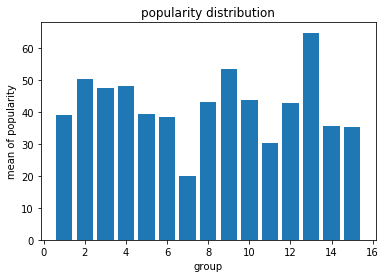

In [100]:
x = np.linspace(1,15,15)
y = mean_group
plt.bar(x,y)
plt.xlabel("group")
plt.ylabel("mean of popularity")
plt.title("popularity distribution")